# Simple MNIST convnet



## Setup

In [1]:
import numpy as np
import keras
#from keras import layers
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

2025-04-15 21:23:39.771362: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-15 21:23:39.794905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744745019.818412  113472 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744745019.825340  113472 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-15 21:23:39.851573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 2
input_shape = (32, 32,1)

# Load the data and split it between train and test sets
#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#print(x_train.shape, y_train.shape)
data = np.load('images.npz')
# Access the arrays stored in the file
for key in data.files:
    print(f"Key: {key}, Array Shape: {data[key].shape}")
X = data['X']
y = data['y']
print("Input shape: ", X.shape)
X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Key: X, Array Shape: (45612, 32, 32)
Key: y, Array Shape: (45612,)
Input shape:  (45612, 32, 32)
x_train shape: (30560, 32, 32, 1, 1)
30560 train samples
15052 test samples


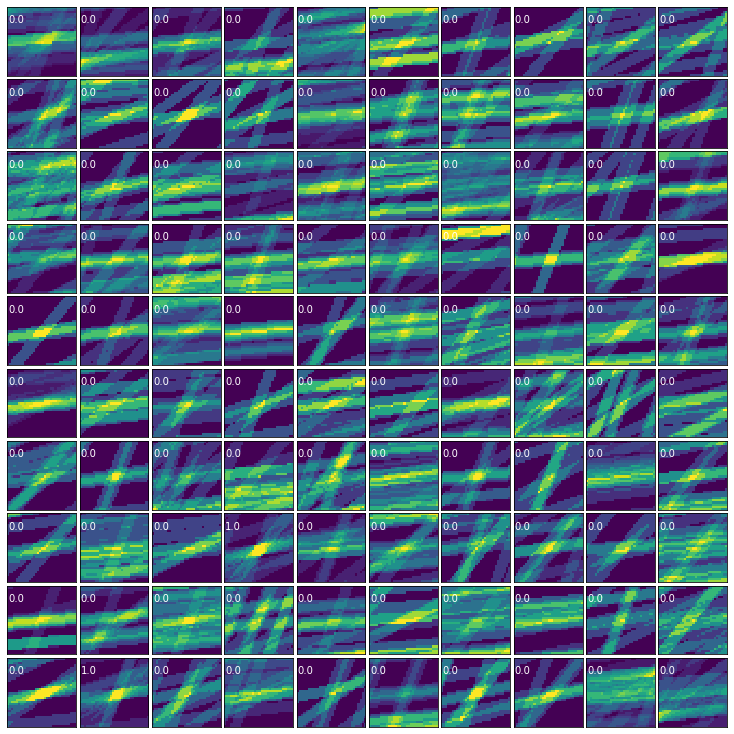

In [3]:
#visualize the maxima

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(input_shape[0],input_shape[1]), cmap=plt.cm.viridis, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i,1]), color ="white")

## Build the model

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/cvmfs/sft.cern.ch/lcg/views/LCG_107_cuda/x86_64-el9-gcc11-opt/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744745036.548970  113472 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:07.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,858 (1.14 MB)

 Trainable params: 297,858 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [5]:
batch_size = 128
epochs = 400

optimizer = keras.optimizers.Adam(
    learning_rate=0.0003)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [6]:
'''
total_samples = len(y_train)
class_counts = y_train.sum(axis=0)  # [count_class_0, count_class_1]

# Inverse frequency weighting
class_weights = {
    0: total_samples / (2 * class_counts[0]),  # Weight for class 0
    1: total_samples / (2 * class_counts[1])   # Weight for class 1
}
print(class_weights)
'''

'\ntotal_samples = len(y_train)\nclass_counts = y_train.sum(axis=0)  # [count_class_0, count_class_1]\n\n# Inverse frequency weighting\nclass_weights = {\n    0: total_samples / (2 * class_counts[0]),  # Weight for class 0\n    1: total_samples / (2 * class_counts[1])   # Weight for class 1\n}\nprint(class_weights)\n'

In [7]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode = 'min',
    restore_best_weights=True
)

In [8]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                    #class_weight=class_weights,
                    validation_split=0.1,
                    callbacks=[early_stopping])

Epoch 1/400


I0000 00:00:1744745041.542949  113567 service.cc:148] XLA service 0x7fca7800e500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744745041.543138  113567 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-04-15 21:24:01.599193: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744745041.849047  113567 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-15 21:24:02.454064: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,32,32]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kN

 14/215 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8371 - loss: 0.6645

I0000 00:00:1744745045.660305  113567 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9091 - loss: 0.3771

2025-04-15 21:24:07.943297: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[112,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[112,1,32,32]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-04-15 21:24:07.948458: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[112,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[112,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9092 - loss: 0.3768

2025-04-15 21:24:11.647689: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1,32,32]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-04-15 21:24:11.652983: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9092 - loss: 0.3765 - val_accuracy: 0.9182 - val_loss: 0.2876
Epoch 2/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9195 - loss: 0.2856 - val_accuracy: 0.9182 - val_loss: 0.2888
Epoch 3/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9217 - loss: 0.2801 - val_accuracy: 0.9182 - val_loss: 0.2818
Epoch 4/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9174 - loss: 0.2881 - val_accuracy: 0.9182 - val_loss: 0.2677
Epoch 5/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9254 - loss: 0.2245 - val_accuracy: 0.9712 - val_loss: 0.0764
Epoch 6/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9615 - loss: 0.0989 - val_accuracy: 0.9833 - val_loss: 0.0464
Epoch 7/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9726 - loss: 0.0814 - val_accuracy: 0.9804 - val_loss: 0.0517
Epoch 8/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9735 - loss: 0.0750 - val_accuracy: 0.98

215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9902 - loss: 0.0307 - val_accuracy: 0.9912 - val_loss: 0.0245
Epoch 52/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9916 - loss: 0.0291 - val_accuracy: 0.9938 - val_loss: 0.0215
Epoch 53/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9931 - val_loss: 0.0227
Epoch 54/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9914 - loss: 0.0286 - val_accuracy: 0.9925 - val_loss: 0.0242
Epoch 55/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9921 - loss: 0.0297 - val_accuracy: 0.9931 - val_loss: 0.0220
Epoch 56/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9915 - loss: 0.0302 - val_accuracy: 0.9941 - val_loss: 0.0205
Epoch 57/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9931 - val_loss: 0.0204
Epoch 58/400
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9924 - loss: 0.0270 - val_accuracy:

## Evaluate the trained model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2025-04-15 21:26:41.894846: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,32,32]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-04-15 21:26:41.930597: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config=

Test loss: 0.020074930042028427
Test accuracy: 0.994751513004303


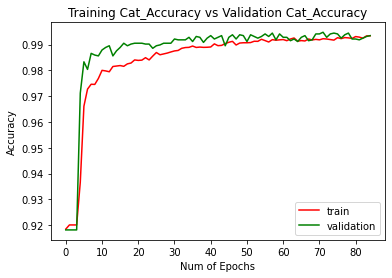

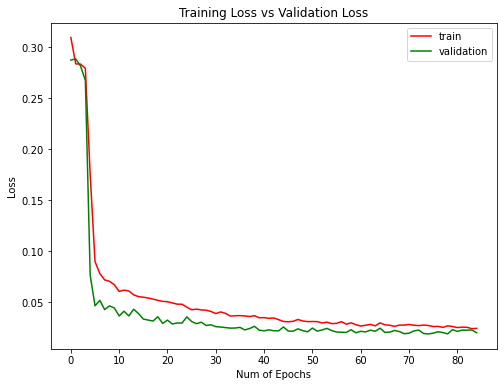

In [10]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])
plt.show()


plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()


In [11]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print("Confussion matrix:")
print(cm)


471/471 - 1s - 3ms/step
Confussion matrix:
[[13718    42]
 [   37  1255]]


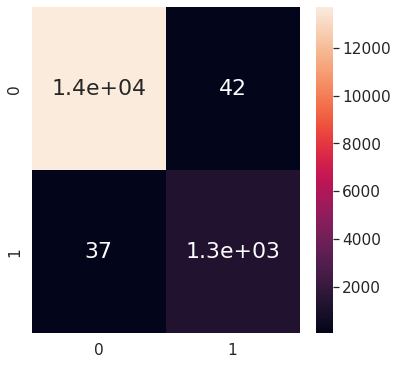

In [12]:

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(num_classes),range(num_classes))
plt.figure(2,figsize = (6,6) )
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 22})# font size
plt.show()

471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


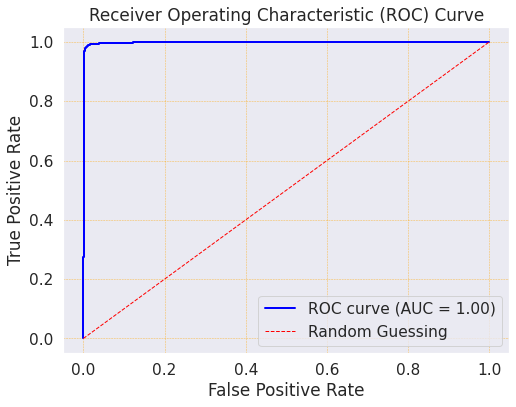

In [13]:

from sklearn.metrics import roc_curve, auc



# Step 1: Predict probabilities for the positive class
y_pred_prob = model.predict(x_test)  # Predict probabilities


# Step 2: Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test[:,1], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1, label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# Add grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color="orange")
plt.show()
